<a href="https://colab.research.google.com/github/mparker2103/PatternFlow/blob/topic-recognition/Improved_UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from skimage.io import imread_collection, imread
from skimage.color import rgb2gray
from skimage.transform import resize
import os

from google.colab import drive

In [2]:
depth = 64
n = 32 #image dim
batch_size = 250
epochs = 20
categories = 10

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read single image from folders; this caches the folder to get Google Colab to iterate through files quicker
train = imread('/content/drive/MyDrive/Colab_Notebooks/Data/ISIC2018_Task1-2_Training_Input_x2/Sample_Set/ISIC_0000000.jpg')
test = imread('/content/drive/MyDrive/Colab_Notebooks/Data/ISIC2018_Task1_Training_GroundTruth_x2/Sample_Set/ISIC_0000000_segmentation.png')

In [18]:
path = '/content/drive/MyDrive/Colab_Notebooks/Data/ISIC2018_Task1-2_Training_Input_x2/Sample_Set/'
train = []
for img in os.listdir(path):
    itm = imread(path + img)
    itm = resize(itm, (384, 511, 3))
    train.append(itm)

train = np.array(train)

In [19]:
path = '/content/drive/MyDrive/Colab_Notebooks/Data/ISIC2018_Task1_Training_GroundTruth_x2/Sample_Set/'
test = []
for img in os.listdir(path):
    itm = imread(path + img)
    itm = resize(itm, (384, 511))
    test.append(itm)

test = np.array(test)

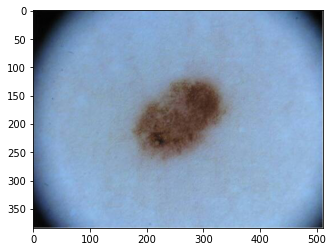

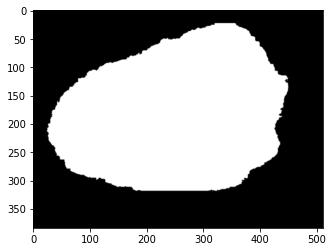

In [20]:
# Check images loaded correctly
plt.imshow(train[0], cmap='gray')
plt.show()
plt.imshow(test[0], cmap='gray')
plt.show()

In [22]:
# Convert image collections to tensors and normalise
train = tf.convert_to_tensor(train)

In [23]:
test = tf.convert_to_tensor(test)

In [25]:
train = tf.cast(train, tf.float32) / 255.
test = tf.cast(test, tf.float32) / 255.

print(train.shape)
print(test.shape)

(92, 384, 511, 3)
(92, 384, 511)


In [ ]:
# create the network
inputs = Input(shape=(n,n,3))
net1 = Conv2D(depth, (3,3), padding='same', activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=(2,2))(net1)
# dropout1 = Dropout(rate=.1)(pool1)
net2 = Conv2D(depth*4, (3,3), padding='same', activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2,2), strides=(1,1))(net2)
dropout2 = Dropout(rate=.2)(pool2)
net3 = Conv2D(depth*8, (3,3), padding='same', activation='relu')(dropout2)
pool3 = MaxPooling2D(pool_size=(2,2))(net3)
# dropout3 = Dropout(rate=.3)(pool3)
net4 = Conv2D(depth*16, (3,3), padding='same', activation='relu')(pool3)
pool4 = MaxPooling2D(pool_size=(2,2), strides=(1,1))(net4)
dropout4 = Dropout(rate=.4)(pool4)
flat = Flatten()(dropout4)
net5 = Dense(depth*32, activation='relu')(flat)
output = Dense(categories, activation='softmax')(net5)

In [ ]:
# Map an input to its reconstruction to create model
model = Model(inputs, output)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_hist = model.fit(X_train, y_train_cat,
            epochs=epochs,
            batch_size=batch_size,
            shuffle=True,
            validation_data=(X_val, y_val_cat))